# Maps viz

In [31]:
import folium as fl

import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

In [32]:
lat = 49.28
lon = -123.12
van_map = fl.Map([lat, lon], zoom_start=12, tiles='Stamen Watercolor')
van_map

# “OpenStreetMap”

# “Mapbox Bright” (Limited levels of zoom for free tiles)

# “Mapbox Control Room” (Limited levels of zoom for free tiles)

# “Stamen” (Terrain, Toner, and Watercolor)

# “Cloudmade” (Must pass API key)

# “Mapbox” (Must pass API key)

# “CartoDB” (positron and dark_matter)

## Map the data

In [89]:
df = pd.read_csv('python_maps/shanghai_hotpot.csv')
df.adname.value_counts()

浦东新区    520
闵行区     272
松江区     217
嘉定区     207
宝山区     175
静安区     145
黄浦区     135
杨浦区     127
青浦区     114
徐汇区     111
普陀区     107
奉贤区     107
长宁区     100
金山区      75
虹口区      71
崇明区      27
Name: adname, dtype: int64

In [90]:
# plt.figure(figsize=(5, 11))

sh_lat = 31.2
sh_lon = 121.5
sh_map = folium.Map([sh_lat, sh_lon], )
sh_map;

In [83]:
import matplotlib.colors as mcolors
import random
import numpy as np
colors = list(mcolors.CSS4_COLORS.keys())
random.choices(colors);

In [112]:
df_sj=df[df.adname=='松江区']
df_sj.lat.mean()

31.05790794108413

In [130]:
hotpots = folium.map.FeatureGroup()
color = np.random.choice(colors)
fill = np.random.choice(colors)
print(f"{color, fill}")
for lat, lng, in zip(df_sj.lat, df_sj.lon):
    hotpots.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, # define the circle marker size
            color=color,
            fill=True,
            fill_color=fill,
            fill_opacity=.4
            
            
            
        )
    )
    
sj_lat, sj_lon = (31.06, 121.25)
# put the featuregroup onto the map
sj_map = folium.Map([sj_lat, sj_lon], zoom_start=12)
hotpots.to_dict()
sj_map.add_child(hotpots)

('thistle', 'darkkhaki')


## Insert names to the locations

In [134]:
print(dir(fl))

['Choropleth', 'Circle', 'CircleMarker', 'ClickForMarker', 'ColorLine', 'ColorMap', 'CssLink', 'CustomIcon', 'Div', 'DivIcon', 'Element', 'FeatureGroup', 'Figure', 'FitBounds', 'GeoJson', 'GeoJsonPopup', 'GeoJsonTooltip', 'Html', 'IFrame', 'Icon', 'JavascriptLink', 'LatLngPopup', 'LayerControl', 'LinearColormap', 'Link', 'MacroElement', 'Map', 'Marker', 'PolyLine', 'Polygon', 'Popup', 'Rectangle', 'RegularPolygonMarker', 'StepColormap', 'TileLayer', 'Tooltip', 'TopoJson', 'Vega', 'VegaLite', 'WmsTileLayer', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'branca', 'elements', 'features', 'folium', 'map', 'raster_layers', 'sys', 'utilities', 'vector_layers']


In [140]:
lats = list(df_sj.lat)
lons = list(df_sj.lon)
names = list(df_sj.name)
for lat, lng, name in zip(lats, lons, names):
    fl.Marker([lat, lng], tooltip = name,).add_to(sj_map)
sj_map

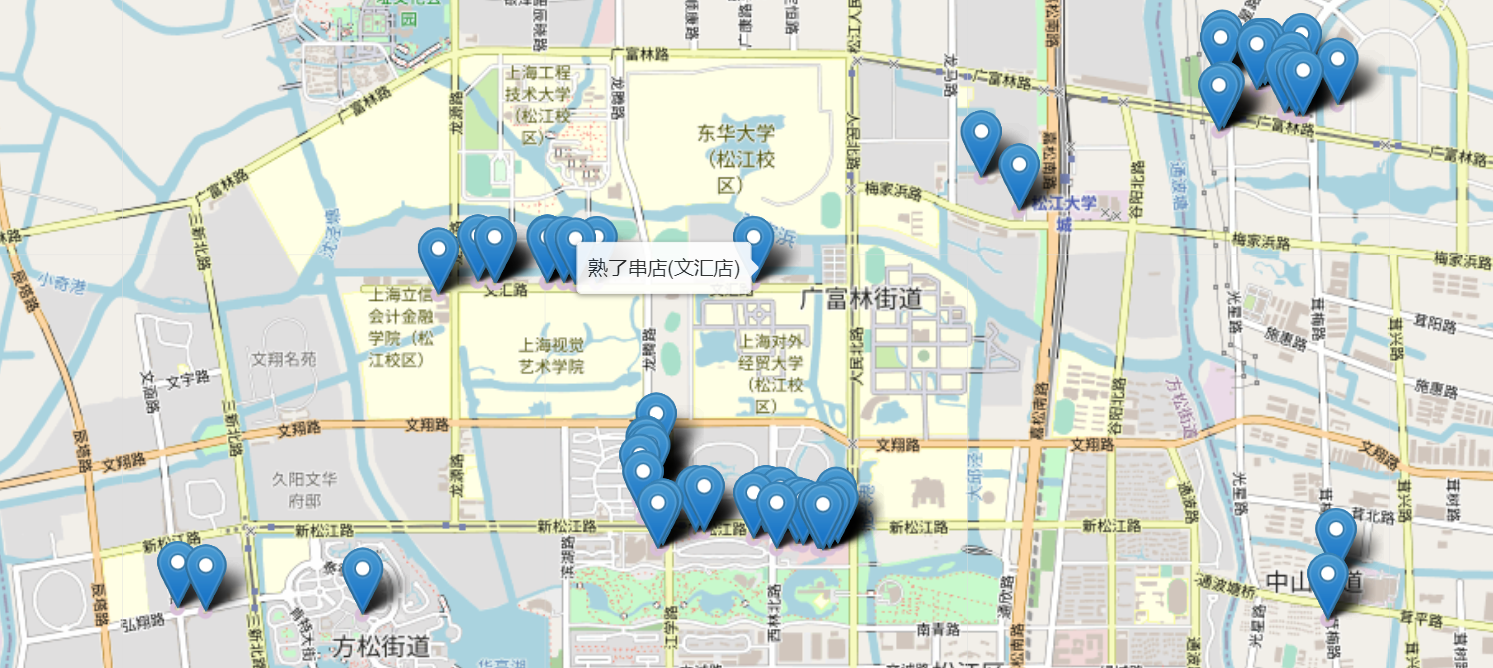